# Introduction

Love-the-life-we-lead-ville? Destined-to-succeed-ville? We-are-all-agreed-ville? You guessed it! Our overall metric for our final project is to find the neighborhood that best mirrors or reflects Thneedville from the Lorax. The inspiration behind choosing the datasets we chose were based on the story and the elements of the book/movie and lyrics of the song on the Original Soundtrack that shares the same name, Thneedville.

## Elevated Blood Lead Levels in Allegheny County

![green boy](https://64.media.tumblr.com/tumblr_m81i0vLKHk1rt3ezbo9_r3_500.gif)

In [2]:
import pandas as pd
import numpy as np
import geopandas as gdp
%matplotlib inline
import matplotlib.pyplot as plt

blood_lead_levels = pd.read_csv("wprdc_ebll.csv")
lead_levels = gdp.read_file("EBLL_CT15_19.shp")
pd.options.display.max_columns = None

lead_levels.plot()
blood_lead_levels.columns

FileNotFoundError: [Errno 2] File wprdc_ebll.csv does not exist: 'wprdc_ebll.csv'

This is the initial graph generated using geopandas and the shp file for the chosen dataset.

**Census Tract Blood Lead Level Test Results Visualized**
<br>The shp file contains geographical data, which is useful to then use geopandas to graph.

<br> *Only using results from 2019 and 2020 since they are the most recent values:*

In [3]:
data = blood_lead_levels.drop(['note2020', 'note2019','note2018','note2017','note2016','note2015', 'note15_20'], axis = 1 )

NameError: name 'blood_lead_levels' is not defined

The columns that give a note for the EBLL values for each years is removed.

In [4]:
updated_values = data.sort_values(by = 'percentEBLL15_20', ascending = False)
important_info = updated_values.head(25)
important_info

NameError: name 'data' is not defined

42003561200 = Wilkinsburg, PA <br>
42003550900 = McKeesport, PA <br>
42003300100 = Knocksville, PA <br>
42003552300 = McKeesport, PA <br>
42003120700 = Homewood West <br>
42003261400 = Perry South <br>
42003552000 = McKeesport <br>
42003261500 = Perrysville, PA/Ross Township <br>
42003561000 = Wilkinsburg, PA <br>
42003512800 = North Braddock <br>
42003271500 = Marshall-Shadeland(Woods Run) <br>
42003130200 = Homewood North <br>
42003270300 = Brighton Heights <br>
42003241200 = Spring Garden <br>
42003250300 = Mexican War Streets/Northside <br>
42003010300 = Bluff(Uptown) <br>
42003260700 = Perry North <br>
42003120400 = Larimer <br>
42003562500 = Esplen/Sheriden <br>
42003111400 = Garfield <br>
42003561700 = St. Clair <br>
42003180300 = Allentown <br>
42003130400 = Homewood South <br>
42003562400 = Beltzhoover/Bon Air <br>
42003508000 = Wilmerding <br>

After ordering the values from greatest to least, the neighborhoods were converted from geoid to a physical location.

In [24]:
wilkinsburg_average = (15.79 + 11.04)/2
mckeesport_average = (14.77 + 12.99 + 11.76)/3
print(wilkinsburg_average)
print(mckeesport_average)

13.415
13.173333333333332


Since Wilkinsburg and McKeesport appear multiple times in the daya, the average is calculated for the final graph.

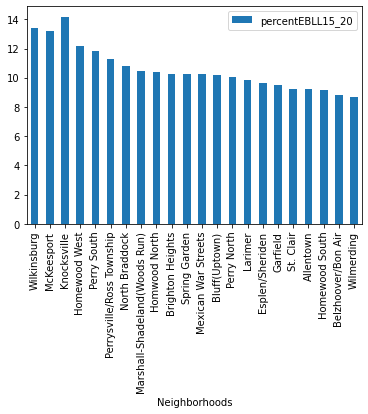

In [25]:
final_ebll = pd.DataFrame({'Neighborhoods': ['Wilkinsburg','McKeesport', 'Knocksville', 'Homewood West', 'Perry South',
                                            'Perrysville/Ross Township', 'North Braddock', 'Marshall-Shadeland(Woods Run)',
                                            'Homwood North', 'Brighton Heights', 'Spring Garden', 'Mexican War Streets',
                                             'Bluff(Uptown)', 'Perry North', 'Larimer', 'Esplen/Sheriden','Garfield','St. Clair'
                                             , 'Allentown', 'Homewood South', 'Belzhoover/Bon Air', 'Wilmerding'],
                          'percentEBLL15_20': [13.42,13.17, 14.17, 12.20, 11.82, 11.28,10.84,10.45,10.37,
                                              10.29, 10.29,10.26, 10.20,10.06,9.84, 9.62, 9.52, 9.26,
                                              9.25, 9.15, 8.85, 8.70]})
final_ebll.plot.bar(x = 'Neighborhoods', y = 'percentEBLL15_20')

**Analysis and Summary of Data**
<br> Overall, the neighborhoods in Pittsburgh and surrounding area that have the highest blood lead levels are either in lower income areas or are in North Side Pittsburgh. Multiple Census Tract numbers that are traceable to Wilkinsburg and McKeesport have a larger recorded percentage of blood lead levels. However, the neighborhood that has the overall highest blood lead level in Knocksville, which has a average percentage of blood lead levels from 2015 to 2020. `

## Capital Projects

In [16]:
import pandas as pd
import geopandas

The town in the Lorax, Thneedville, was set up entirely as a result of capital greed. To find the neighborhood that best matches Thneedville, I will look at the captial projects throughout Pittsburgh, and find the best. 

In [17]:
capital = pd.read_csv("capitalprojects.csv", sep = ',', index_col = 'id')

capital.sample(5)


FileNotFoundError: [Errno 2] File capitalprojects.csv does not exist: 'capitalprojects.csv'

In [13]:
capital_projects.groupby(['neighborhood']).mean()

NameError: name 'capital_projects' is not defined

In [29]:
capital_projects.describe()

NameError: name 'capital_projects' is not defined

On average, the neighborhoods in Pittsburgh are spending around *1.94 million* dollars on each capital project. 

## Neighborhoods with Highest Budgets

To get a better sense of which neighborhoods are spending the most, we'll look at the total spending of each neighborhood, as well as the average they're spending on each project.

In [30]:
capital_projects = capital.groupby("neighborhood").sum()['budgeted_amount']
budget_capital = capital_projects.sort_values(ascending = False)

In [31]:
budget_capital.head()

neighborhood
Greenfield                   13047700.0
South Side Flats              9046026.0
Central Business District     8206845.0
Allegheny West                6813068.2
Elliott                       6675768.0
Name: budgeted_amount, dtype: float64

In [32]:
projects_neighborhood = capital.groupby("neighborhood").mean()['budgeted_amount']
projects_neighborhood.sort_values(ascending = False).head()

neighborhood
Knoxville         1.450000e+06
Swisshelm Park    1.365667e+06
Greenfield        1.003669e+06
Allegheny West    9.732955e+05
Banksville        7.432500e+05
Name: budgeted_amount, dtype: float64

Unlike the total budget of each neighborhood, *Knoxville*, tops the chart at around **1.45 million dollars** per project. Greenfield, however, has the highest total budget for captial projects.

There are a lot of NaN, so we'll drop the columns that don't mean much to our metric.

In [33]:
capital_df = capital.dropna()
capital_df.sample(5)

,name,task_description,area,budgeted_amount,status,asset_id,asset_type,fiscal_year,start_date,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
id,,,,,,,,,,,,,,,,,,,,
171113822,18TH STREET SIGNAL UPDATES (TIP),18th Street Signal Upgrades - Final Design,Engineering and Construction,100000.0,Planned,TS279,Signalized Intersection,2018,2018-02-14,f,South Side Flats,3.0,17.0,4.200317e+10,3.0,17.0,3.0,4-24,40.426953,-79.980741
720099362,COMPLETE STREETS,ALLEGHENY CIRCLE - PHASE II CONSTRUCTION,Engineering and Construction,100000.0,Planned,TS237,Signalized Intersection,2019,2019-02-06,f,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-6,40.450312,-80.004898
247307022,PARK RECONSTRUCTION,Sidewalk Repair - Armstrong Park,Facility Improvement,7500.0,Planned,Armstrong Park,Sidewalk,2017,2017-02-08,f,South Side Flats,3.0,17.0,4.200317e+10,3.0,17.0,3.0,4-24,40.428063,-79.985856
2107740644,FACILITY IMPROVEMENTS - PUBLIC SAFETY FACILITIES,Fire Station 35 - Stair Replacement,Facility Improvement,25000.0,In Progress,Firehouse 35,Facility,2019,2019-04-11,f,Brighton Heights,1.0,27.0,4.200327e+10,1.0,27.0,1.0,1-14,40.481736,-80.038971
454894021,FACILITY IMPROVEMENTS - RECREATION AND SENIOR ...,SHERADEN HEALTHY ACTIVE LIVING CENTER - EXTERI...,Facility Improvement,135000.0,Planned,Sheraden Senior Center,Facility,2019,2019-02-05,f,Sheraden,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-16,40.455200,-80.056707


In [ ]:
#mask to only look at neighborhoods above threshold
project_mask = capital_df['budgeted_amount'] >= 1200000
high_budget = capital_df[project_mask]
high_budget.shape[0]

In [ ]:
high_budget.sort_values(by = 'budgeted_amount', ascending = False).head(7)

In [ ]:
#create mask to look at individual neighborhoods
greenfield_mask = capital_df['neighborhood'] == 'Greenfield'
greenfield_df = capital_df[greenfield_mask]

greenfield_df['status'].value_counts()

In [ ]:
greenfield_df['status'].value_counts().sort_index().plot.pie()

In [ ]:
south_mask = capital_df['neighborhood'] == 'South Side Flats'
south_df = capital_df[south_mask]

south_df['status'].value_counts()

In [ ]:
south_df['status'].value_counts().sort_index().plot.pie()

In [ ]:
#mask to keep in progress and completed
complete_project = capital_df['status'] != 'Planned'
complete_df = capital_df[complete_project]

total_budget = complete_df.groupby('neighborhood').sum()['budgeted_amount']

In [ ]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") 

In [ ]:
#plot based on total budget for each neighborhood
capital_map = neighborhoods.merge(total_budget, how='left', left_on='hood', right_on='neighborhood')
capital_map.dropna()
capital_map[['hood', 'budgeted_amount', 'geometry']]

In [ ]:
capital_map.plot(column = 'budgeted_amount', 
                cmap = 'OrRd',
                edgecolor = 'black',
                legend = True,
                legend_kwds = {'label': 'Budget'})

In [ ]:
total_budget.sort_values(ascending = False)

The highest budget for all capital projects in a neighborhood is in **Squirrel Hill North** with a budget of around **4 Million dollars**. South Side Flats and Central Business District follow with budgets of 2.8 million and 2.6 million respectively. 

Given this information, the best neighborhood in Pittsburgh is **Squirrel Hill North**. It best resembles Thneedville from the Lorax, given it's high capital budget.